# SALONI DHADDA


IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#IMPORTING DATASET

In [2]:
dataset = pd.read_csv("heart.csv")

In [ ]:
#UNDERSTANDING THE DATASET

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


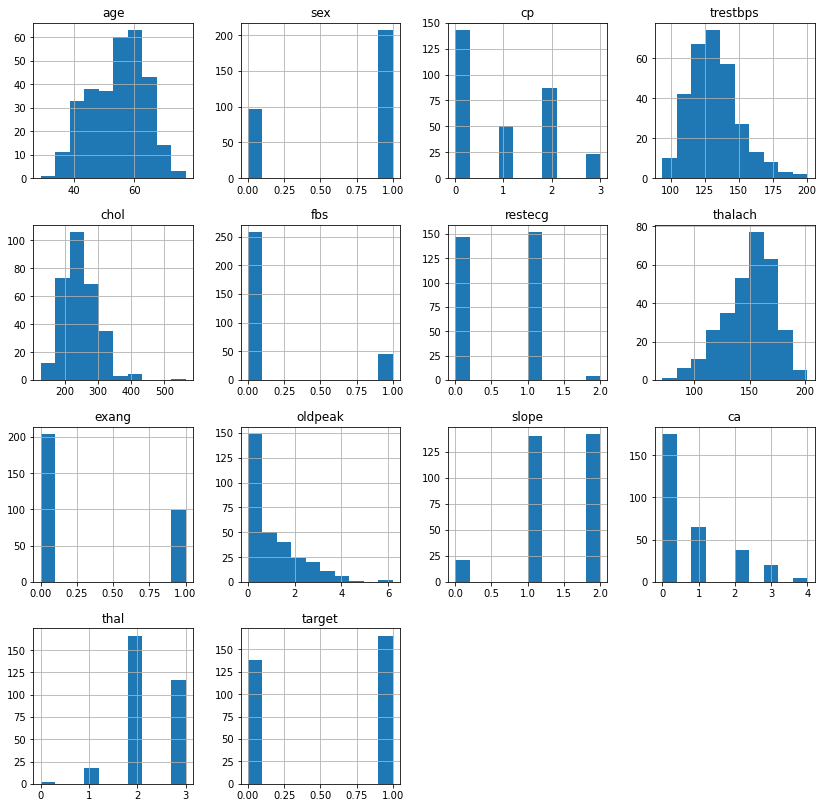

In [5]:
dataset.hist(figsize=(14,14))
plt.show()

In [ ]:
#ANALYZING FEATURES

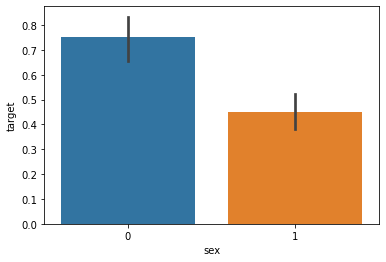

In [6]:
sns.barplot(dataset['sex'],dataset['target'])
plt.show()

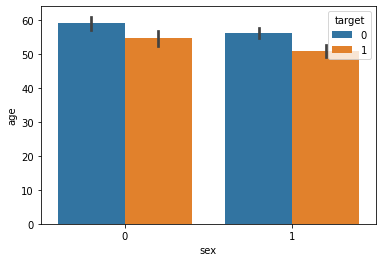

In [7]:
sns.barplot(dataset['sex'],dataset['age'],hue=dataset['target'])
plt.show()

<AxesSubplot:xlabel='cp', ylabel='target'>

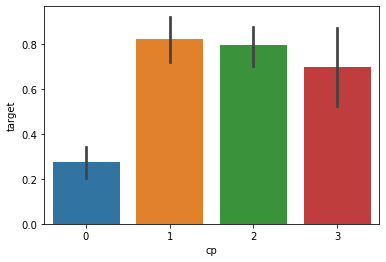

In [8]:
sns.barplot(dataset["cp"],dataset['target'])

In [9]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

<AxesSubplot:xlabel='fbs', ylabel='target'>

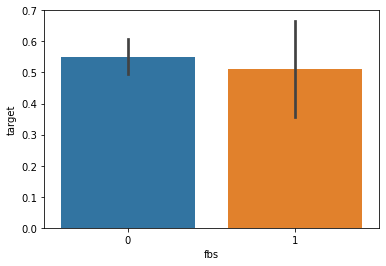

In [10]:
sns.barplot(dataset["fbs"],dataset['target'])

<AxesSubplot:xlabel='restecg', ylabel='target'>

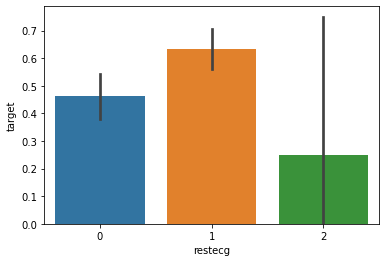

In [11]:
sns.barplot(dataset["restecg"],dataset['target'])

<AxesSubplot:xlabel='exang', ylabel='target'>

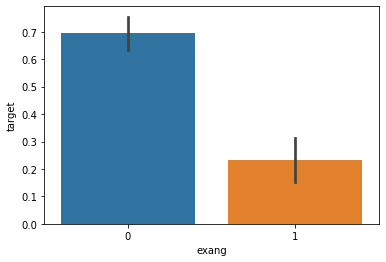

In [12]:
sns.barplot(dataset["exang"],dataset['target'])

<AxesSubplot:xlabel='slope', ylabel='target'>

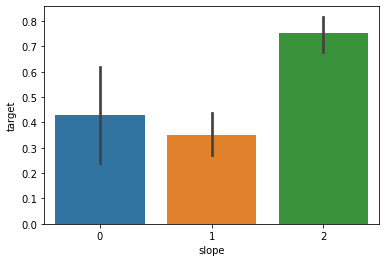

In [13]:
sns.barplot(dataset["slope"],dataset['target'])

In [14]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

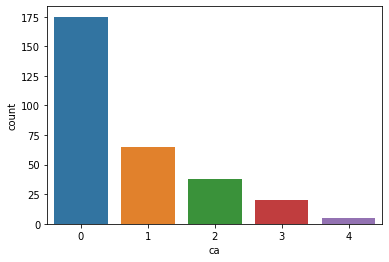

In [15]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

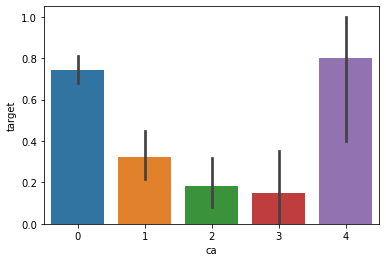

In [16]:
sns.barplot(dataset["ca"],dataset['target'])

<AxesSubplot:xlabel='thal', ylabel='target'>

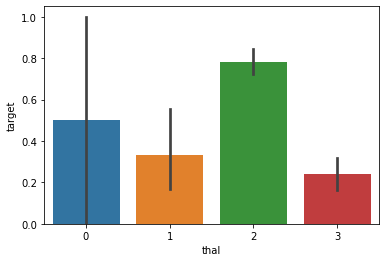

In [17]:
sns.barplot(dataset["thal"],dataset['target'])

In [ ]:
#TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [19]:
X_train.shape

(242, 13)

In [20]:
X_test.shape

(61, 13)

In [21]:
Y_train.shape

(242,)

In [22]:
X_test.shape

(61, 13)

In [ ]:
#MODELLING

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
#LOGISTICS

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [26]:
Y_pred_lr.shape

(61,)

In [27]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [ ]:
# K NEAREST NEIGHBOURS

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [29]:
Y_pred_knn.shape

(61,)

In [30]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [31]:
#OUTPUT

In [32]:
scores = [score_lr,score_knn]
algorithms = ["Logistic Regression","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

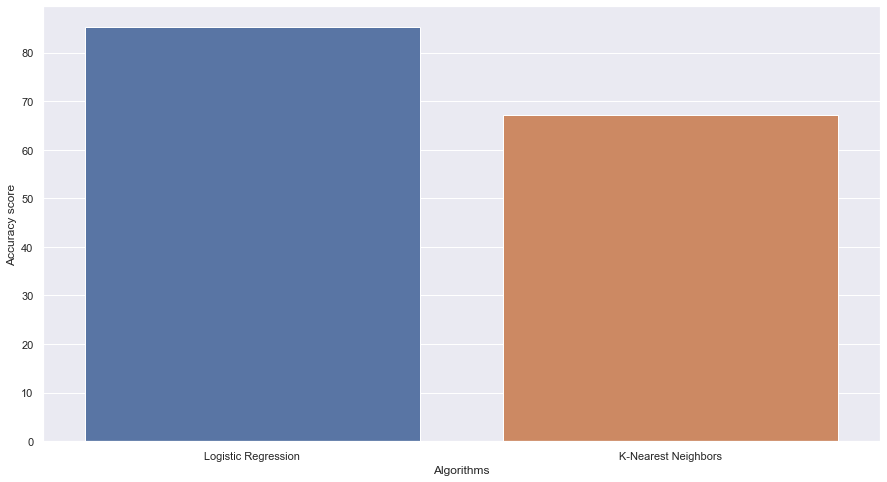

In [33]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)